# Spotify 1 Million Tracks - Exploração de Dados

### Descrição

... Alterar

### Os Dados

... Atualizar

Audio Features:

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - uma medição perceptual da intensidade e atividade da música (0.0 a 1.0);
- **Key** - a tonalidade da música (-1 a 11): -1 no key detected;
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB);
- **Mode** - modalidade da música (0 - Menor ou 1 - Maior);
- **Speechiness** - a presença de fala na música;
- **Acousticness** - medida de confiança (0 a 1) em saber se a música é acústica;
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na gravação da música (0 a 1);
- **Valence** - positividade musical (0 a 1);
- **Tempo** - o tempo da música em batimentos por minuto(BPM);
- **Time_signature** - assinatura do tempo de uma música (3 a 7);
- **Duration_ms** - duração em milissegundos.

## Importar bibliotecas

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from scipy import stats
%matplotlib inline

# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Compreender os dados

Carregar o dataset

In [10]:
data = pd.read_csv('data.csv')

Visualizar features do problema

In [11]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Informações sobre valores nulos e tipos de dados de cada coluna

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Analyse distinct values for 'track_id' and 'Unnamed: 0' fields

In [13]:
data["id"].value_counts()

id
6KbQ3uYMLKb5jDxLF7wYDD    1
1wbM7WXEKWPxqwFg3iR6BU    1
7e3KM7NU4FMdfSKolIJtMI    1
1pPrO5Lcx9UXNebcloGeHE    1
0XFfzuPe33FeLDRybwwYhd    1
                         ..
102yVwuDzXJ8R7bbA5zIG7    1
106dYCMIYBfdFhJMbWTEr2    1
10KlzvuaAH7p2LDWYbl4ph    1
10MqlNJk9H3a6vDN0BzBj7    1
60RFlt48hm0l4Fu0JoccOl    1
Name: count, Length: 169909, dtype: int64

Os valores são todos distintos, logo devemos remover esta coluna do dataset

In [14]:
data.drop("id", axis=1, inplace=True)

In [15]:
data["name"].value_counts()

name
Summertime                                              62
Overture                                                43
Home                                                    40
Stay                                                    34
You                                                     33
                                                        ..
Are We Going Down                                        1
The Century of the Common Man                            1
El Noveno Mandamiento - Instrumental (Remasterizado)     1
É Ôro Só (Ponto de Exu)                                  1
How Would I Know                                         1
Name: count, Length: 132940, dtype: int64

Apresentação de valores médios, quartis, mediana, mínimo, máximo, etc de cada coluna

In [16]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


Apresentação dos primeiros registos do dataset

In [17]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Apresentação dos últimos registos do dataset

In [18]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.472,2020
169908,0.1090,['Ingrid Andress'],0.512,214787,0.428,0,0.000000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.366,2020


Converter duração para minutos, para ser mais fácil visualizar

In [19]:
data['duration_minutes'] = data['duration_ms'] / (1000 * 60)

In [20]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minutes
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2.644133
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.702217
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1.738333
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3.012667
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,11.462217


Verificar se tem duplicados

In [21]:
duplicated = data.duplicated()
print(data[duplicated])

        acousticness                                            artists  \
609          0.98300  ['Sergei Rachmaninoff', 'William Kapell', 'Fri...   
652          0.91300                                 ['William Kapell']   
3344         0.12800                                ['Curtis Mayfield']   
8094         0.46000                                          ['Morat']   
8169         0.99300               ['Franz Liszt', 'Vladimir Horowitz']   
...              ...                                                ...   
163154       0.97600  ['Ludwig van Beethoven', 'Budapest String Quar...   
163168       0.71700  ['Franz Lehár', 'Anton Niessner/Emmy Loose/Nic...   
166015       0.21300                                   ['Led Zeppelin']   
169035       0.80600                                   ['Lana Del Rey']   
169219       0.00245                                   ['Taylor Swift']   

        danceability  duration_ms  energy  explicit  instrumentalness  key  \
609            0.635 

Encontramos 588 registos duplicatos

Focar em estatísticas do target do problema (a popularidade)

In [22]:
data['popularity'].describe().apply("{0:.2f}".format)

count    169909.00
mean         31.56
std          21.58
min           0.00
25%          12.00
50%          33.00
75%          48.00
max         100.00
Name: popularity, dtype: object

Podemos concluir que os valores para esta feature não estão bem distribuídos. Apesar de variar entre 0 e 100, metade dos valores são inferiores a 34, o que mostra que a maioria das popularidades medidas está próxima de 0.

Vamos então entender melhor a distribuição das popularidades, recorrendo a um histograma

<Axes: >

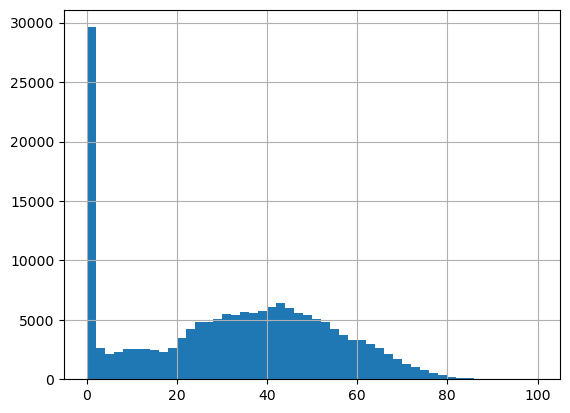

In [23]:
data['popularity'].hist(bins=50)

Encontramos muitos valores próximos de 0. Esses valores terão de ser tratados de modo a melhorar a distribuição dos valores no dataset.

In [24]:
data[data['popularity'] == 0]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minutes
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2.644133
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.702217
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1.738333
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3.012667
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928,5.876667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169822,0.217,['Don Omar'],0.741,255680,0.7870,0,0.017900,5,0.0835,-6.228,1,Pobre Diabla,0,2020-06-05,0.0525,91.993,0.7710,2020,4.261333
169825,0.913,['ROSALÍA'],0.698,253109,0.2900,0,0.000021,4,0.0950,-6.899,0,Aunque Es De Noche,0,2020-06-05,0.0510,137.949,0.3980,2020,4.218483
169826,0.921,['ROSALÍA'],0.442,214012,0.2670,0,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.3220,2020,3.566867
169849,0.262,['Ellie Goulding'],0.453,148689,0.3160,0,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,2020-06-05,0.0316,125.628,0.1770,2020,2.478150


Entender quais são as músicas mais populares e as menos populares

In [25]:
data.sort_values(by=['popularity'], ascending=False)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minutes
87942,0.00146,['The Weeknd'],0.514,200040,0.73000,0,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020,3.334000
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.69000,1,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020,3.028883
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.43100,0,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020,2.888883
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.53700,1,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020,2.766300
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.77400,0,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019,2.942450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145185,0.99500,"['Leela Chitnis', 'Arun Kumar']",0.682,200870,0.06800,0,0.120000,4,0.1260,-12.267,0,Nadiya Ke Tat Pe Khadi Hoon,0,1941-12-31,0.3020,74.537,0.872,1941,3.347833
145183,0.80400,['Ravi'],0.400,200027,0.38000,0,0.700000,3,0.1920,-12.655,1,Main Hoon Majboor,0,1941-12-01,0.0340,158.558,0.490,1941,3.333783
145181,0.99500,"['Ibrahim Özgür', 'Park Otel Orkestrası']",0.379,189015,0.08830,0,0.920000,2,0.1290,-19.572,0,Kalbimde Hiç Yerin Kalmadı,0,1941-01-01,0.0703,64.766,0.514,1941,3.150250
145179,0.99200,"['Ludwig van Beethoven', 'Claudio Arrau']",0.307,68067,0.00757,0,0.760000,3,0.1350,-28.996,1,"Variations and Fugue in E-Flat Major, Op. 35 ""...",0,1941,0.0430,137.694,0.207,1941,1.134450


As 5 músicas mais populares são recentes (2022 e 2023), enquanto que as 5 músicas menos populares são anteriores a 2010

Vamos também analisar quais os artistas mais populares. Para isso, teremos que tratar a coluna dos artistas, criando um novo registo para cada artista da música.

In [26]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)

In [27]:
data['artists'] = data['artists'].str.split(', ')

In [28]:
df_exploded = data.explode('artists')
df_exploded

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minutes
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2.644133
1,0.9940,Robert Schumann,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.702217
1,0.9940,Vladimir Horowitz,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.702217
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1.738333
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3.012667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,Kygo,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,3.011667
169906,0.5380,Oh Wonder,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,3.011667
169907,0.0714,Cash Cash,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,2.788467
169907,0.0714,Andy Grammer,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,2.788467


Verificar quais são os artistas mais populares

In [29]:
groups_artist_name = df_exploded.groupby(by=['artists']).agg({'name':'count', 'popularity':'median'}).rename(columns={'name':'count'}).reset_index().sort_values(by=['popularity'], ascending=False)
groups_artist_name[groups_artist_name['count'] > 10] # Only show artists with more than N songs

,artists,count,popularity
19899,Rauw Alejandro,16,79.5
2186,Ava Max,12,78.0
21514,Sech,22,78.0
6867,Dua Lipa,33,77.0
3023,Billie Eilish,41,77.0
...,...,...,...
729,Academia dos Renascidos,20,0.0
12498,Joseph Keilberth,34,0.0
12471,Josef Metternich,12,0.0
22165,Snehprabha Pradhan,19,0.0


... e quais os artistas com mais músicas

In [30]:
groups_artist_name.sort_values(by=['count'], ascending=False)

,artists,count,popularity
8357,Francisco Canaro,2234,0.0
27656,Эрнест Хемингуэй,1215,0.0
8613,Frédéric Chopin,1035,0.0
15057,Ludwig van Beethoven,976,0.0
26697,Wolfgang Amadeus Mozart,938,0.0
...,...,...,...
493,2Pac a.k.a. Makaveli,1,42.0
21742,Shep,1,42.0
10396,House of Heroes,1,42.0
24944,The White Tie Affair,1,42.0


Vamos também analisar as tendências em cada ano

In [31]:
# Formato das datas
data["release_date"].tail()

169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, dtype: object

In [32]:
# Documentar o que foi feito aqui
import re

data_copy = data.copy()
data_copy["release_date"] = pd.to_datetime(data["release_date"], format='%Y-%m-%d', errors='coerce')

for index, row in data_copy.iterrows():
    if pd.isna(row['release_date']):
        original_value = data.loc[index, 'release_date']
        pattern = r'(\d{4})(-(\d{2}))?'
        match = re.search(pattern, original_value)
        if match:
            year = match.group(1)
            month = match.group(3) if match.group(3) else '01'  # se missing, assume 01
            day = '01' # se missing, assume 01
            new_date = year + '-' + month + '-' + day
            data_copy.loc[index, 'release_date'] = new_date       


In [33]:
assert data_copy["release_date"].isnull().sum() == 0, 'missing date'

Recuperar o ano, més e data de lançamento da música

In [34]:
data_copy["release_date_year"] = data_copy["release_date"].dt.year
data_copy["release_date_month"] = data_copy["release_date"].dt.month
data_copy["release_date_day"] = data_copy["release_date"].dt.day
data_copy.drop(columns=['release_date'], inplace=True)
data_copy.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,duration_minutes,release_date_year,release_date_month,release_date_day
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,...,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,2.644133,1928,1,1
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,...,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,4.702217,1928,1,1
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,...,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1.738333,1928,1,1
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,...,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,3.012667,1928,9,25
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,...,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,11.462217,1928,1,1


In [35]:
data_copy.drop(columns=['year'], inplace=True)

In [36]:
data_copy

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,duration_minutes,release_date_year,release_date_month,release_date_day
0,0.9950,[Carl Woitschach],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,2.644133,1928,1,1
1,0.9940,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,4.702217,1928,1,1
2,0.6040,[Seweryn Goszczyński],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1.738333,1928,1,1
3,0.9950,[Francisco Canaro],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,3.012667,1928,9,25
4,0.9900,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,11.462217,1928,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"[DripReport, Tyga]",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2.730000,2020,5,15
169905,0.0167,"[Leon Bridges, Terrace Martin]",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2.791133,2020,6,8
169906,0.5380,"[Kygo, Oh Wonder]",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,3.011667,2020,5,29
169907,0.0714,"[Cash Cash, Andy Grammer]",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2.788467,2020,2,28


In [37]:
data_copy.groupby(by=['release_date_year']).mean(numeric_only=True)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_minutes,release_date_month,release_date_day
release_date_year,,,,,,,,,,,,,,,,,
1921,0.895823,0.425661,229911.914062,0.236784,0.054688,0.322330,5.031250,0.215814,-17.095437,0.656250,0.351562,0.077258,100.397758,0.425495,3.831865,1.929688,5.437500
1922,0.939236,0.480000,167904.541667,0.237026,0.000000,0.440470,5.236111,0.238647,-19.179958,0.625000,0.138889,0.115419,101.376139,0.534056,2.798409,2.166667,15.805556
1923,0.976329,0.568462,178356.301775,0.246936,0.000000,0.401932,4.846154,0.236656,-14.373882,0.775148,5.727811,0.098619,112.456598,0.624788,2.972605,2.076923,5.455621
1924,0.935575,0.548654,188461.649789,0.347033,0.000000,0.583955,5.637131,0.237875,-14.202304,0.751055,0.603376,0.090210,120.653359,0.668574,3.141027,3.371308,7.181435
1925,0.965422,0.571890,184130.699620,0.264373,0.000000,0.408893,5.171103,0.243094,-14.516707,0.718631,2.707224,0.115457,115.671715,0.616430,3.068845,2.418251,5.657795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.280290,0.599976,219400.763840,0.592877,0.333164,0.074646,5.225495,0.180198,-7.949913,0.638903,61.371254,0.107298,119.070344,0.430769,3.656679,7.013713,15.230066
2017,0.289916,0.612286,209343.613000,0.586739,0.349000,0.098209,5.073000,0.194218,-8.422697,0.624500,64.861500,0.111752,116.840277,0.414465,3.489060,6.801000,15.329500
2018,0.271941,0.664930,200919.119000,0.590591,0.468000,0.035948,5.347500,0.171781,-7.253666,0.613000,67.276000,0.128140,122.004325,0.447141,3.348652,7.134500,16.008000


Algumas conclusões interessantes:

- quanto mais próximas do atual, maior é a popularidade da música;

- as músicas tem-se tornado mais enérgicas;

- e têm perdido acústica e valência;

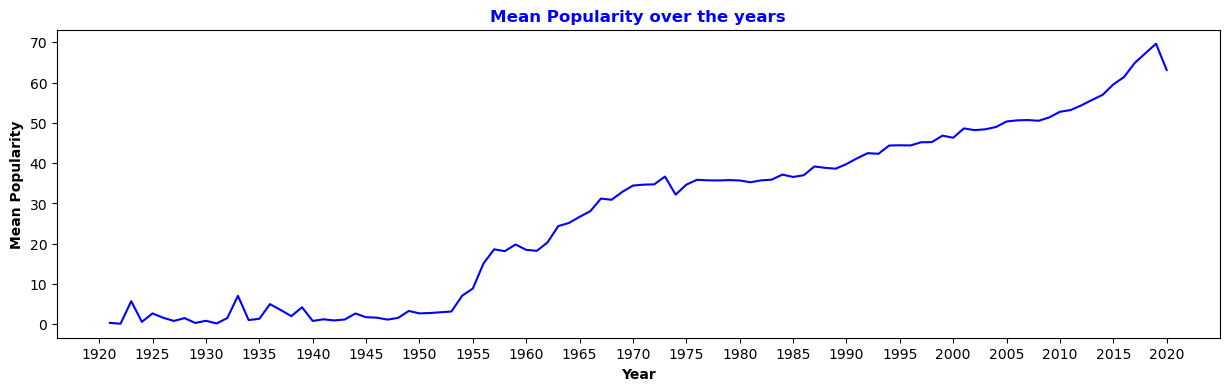

In [40]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = data_copy.groupby('release_date_year')['popularity'].mean().plot(color='blue')
ax.set_title('Mean Popularity over the years', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

Vamos verificar se os anos de lançamento das músicas estão bem distribuídos

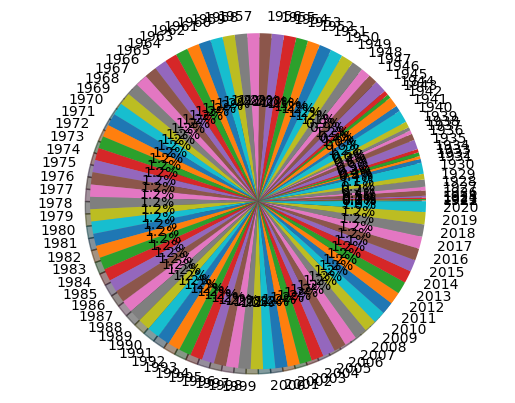

In [42]:
labels = data_copy['release_date_year'].astype('category').cat.categories.tolist()
counts = data_copy['release_date_year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Verificamos que sim

## Missing Values

Vamos verificar a existência de missing values

<Axes: >

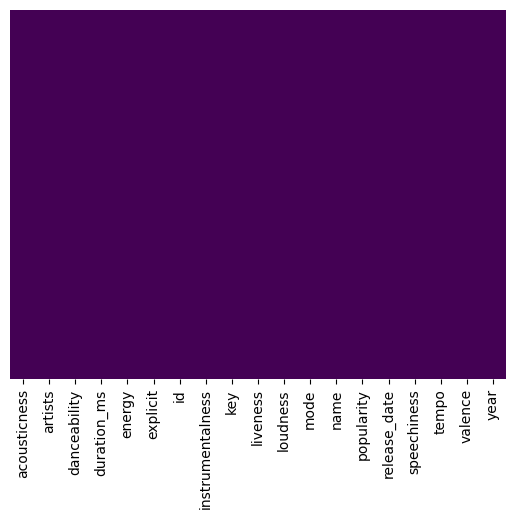

In [64]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como podemos ver, não há missing values no nosso dataset.

## Correlações

In [ ]:
# le = preprocessing.LabelEncoder()
# data_categorical_encoded = data.copy()
# data_categorical_encoded.drop(columns=['track_id', 'track_album_id', 'playlist_id'], inplace=True)

# data_categorical_encoded['playlist_genre'] = le.fit_transform(data['playlist_genre'])
# data_categorical_encoded['playlist_subgenre']= le.fit_transform(data['playlist_subgenre'])
# data_categorical_encoded['track_album_name']= le.fit_transform(data['track_album_name'])
# data_categorical_encoded['playlist_name']= le.fit_transform(data['playlist_name'])
# data_categorical_encoded['track_name']= le.fit_transform(data['track_name'])
# data_categorical_encoded['track_artist']= le.fit_transform(data['track_artist'])

# data_categorical_encoded.head()

In [65]:
data = data[data["popularity"] != 0]

<Axes: >

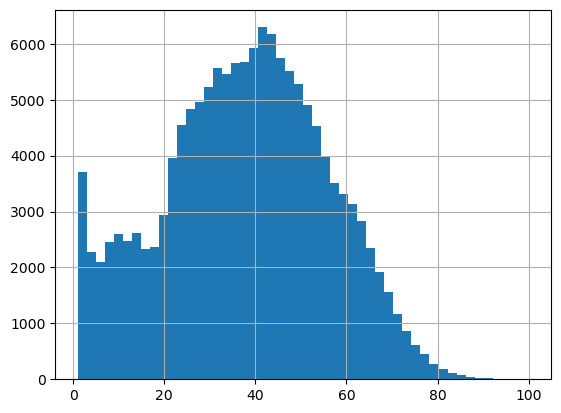

In [66]:
data['popularity'].hist(bins=50)

### Correlação de pearson

<Axes: >

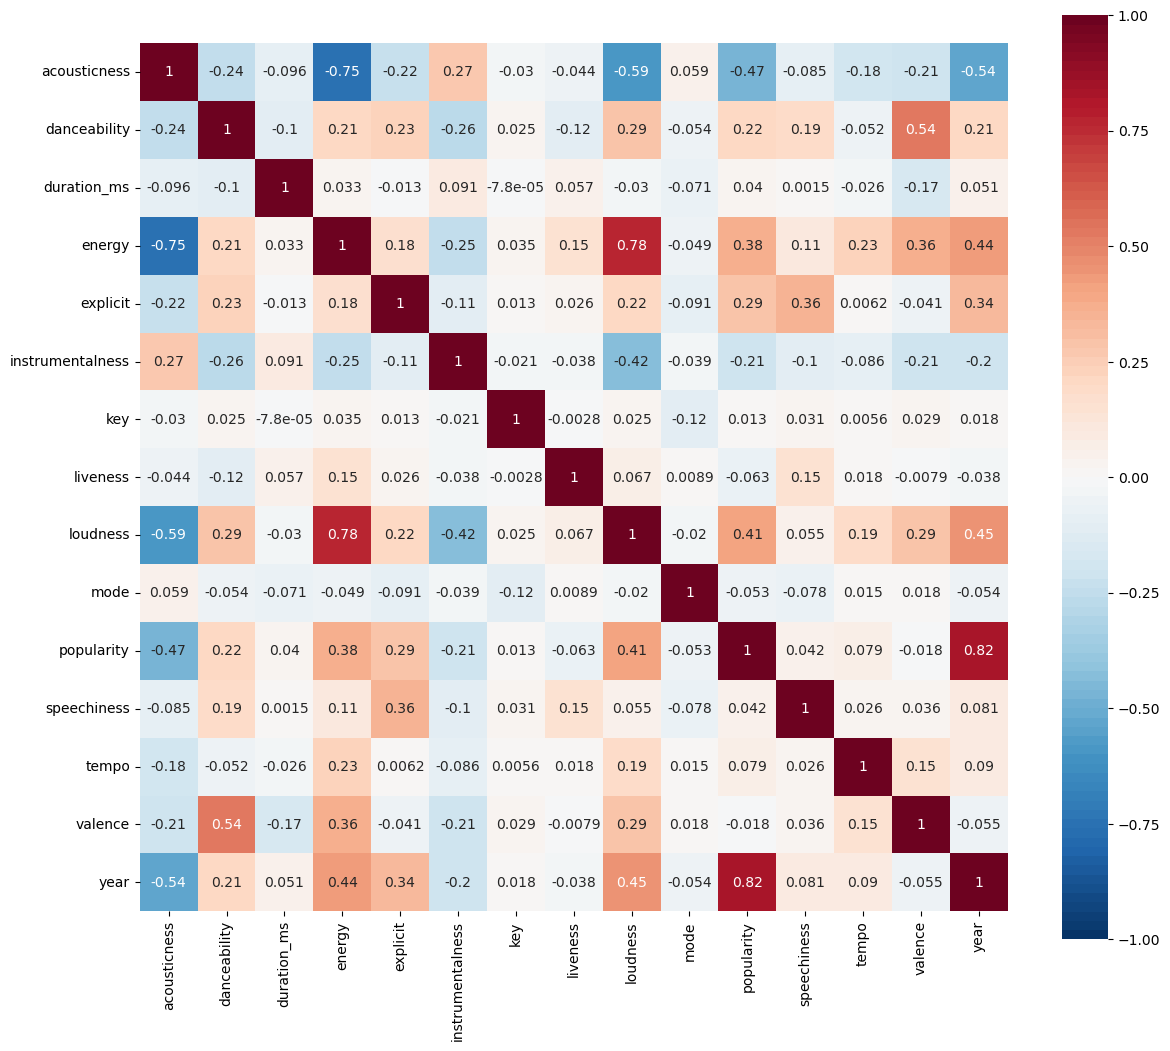

In [67]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Spearman

<Axes: >

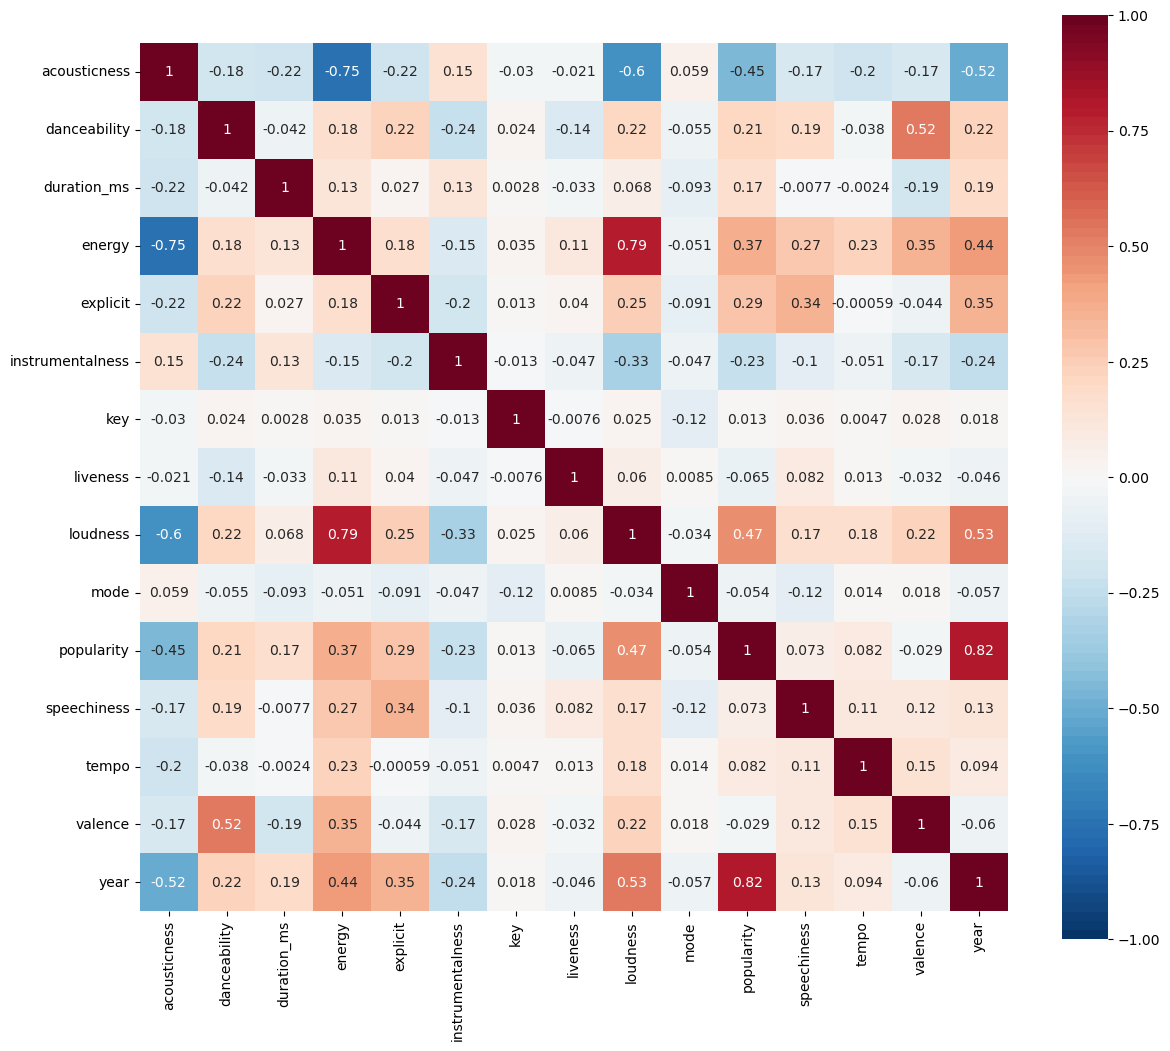

In [ ]:
corr_matrix = data.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Kendall

<Axes: >

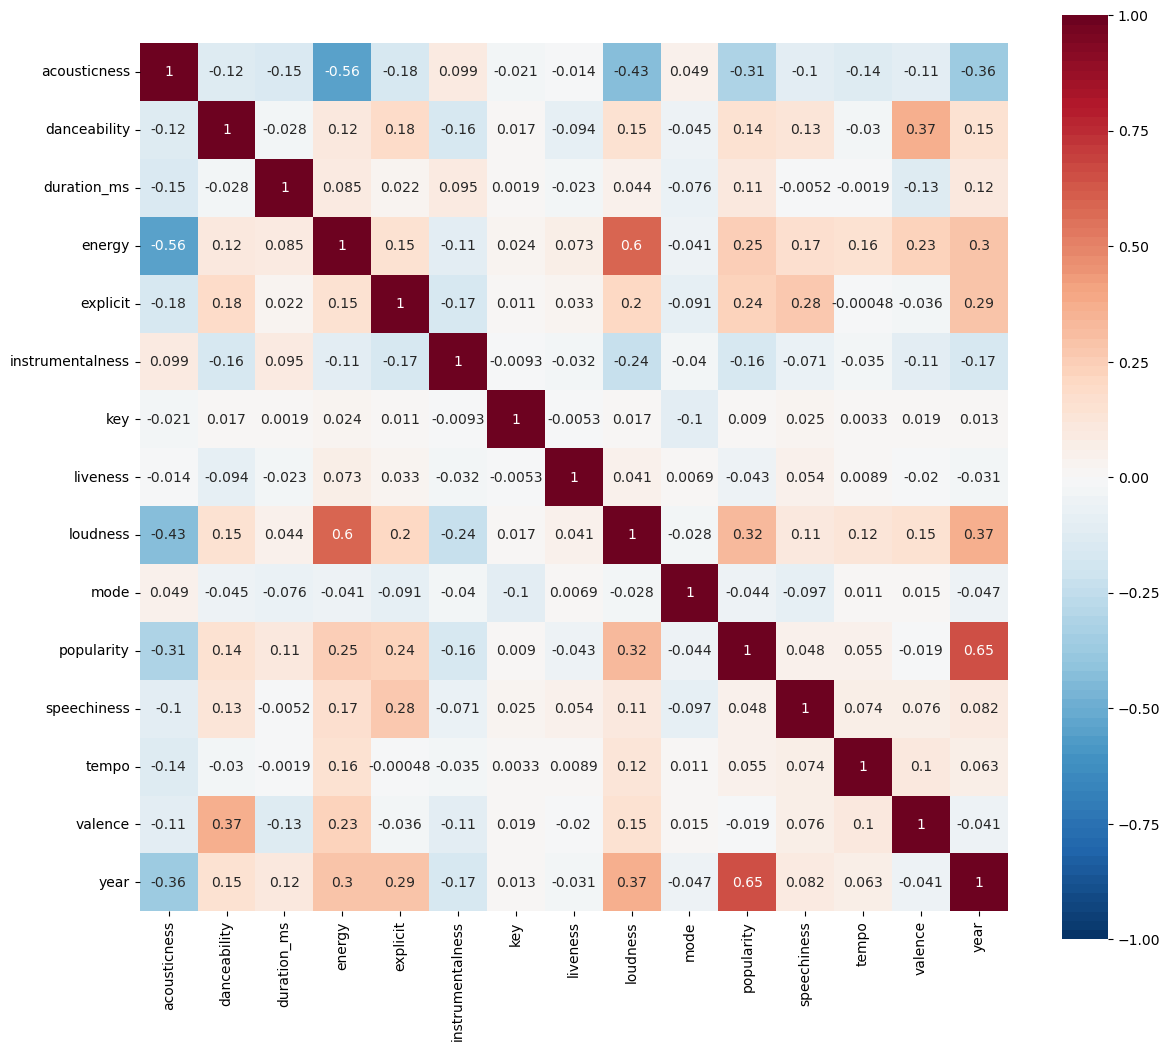

In [68]:
corr_matrix = data.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

Das 3 correlações analisadas podemos ver que as features com maior correlação com a popularidade são:
- year;
- loudness;
- instrumentalness;
- explicit;
- energy;
- duration_ms;
- danceability;
- accousticness;

Podemos também visualizar a distribuição dos dados coluna vs coluna

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


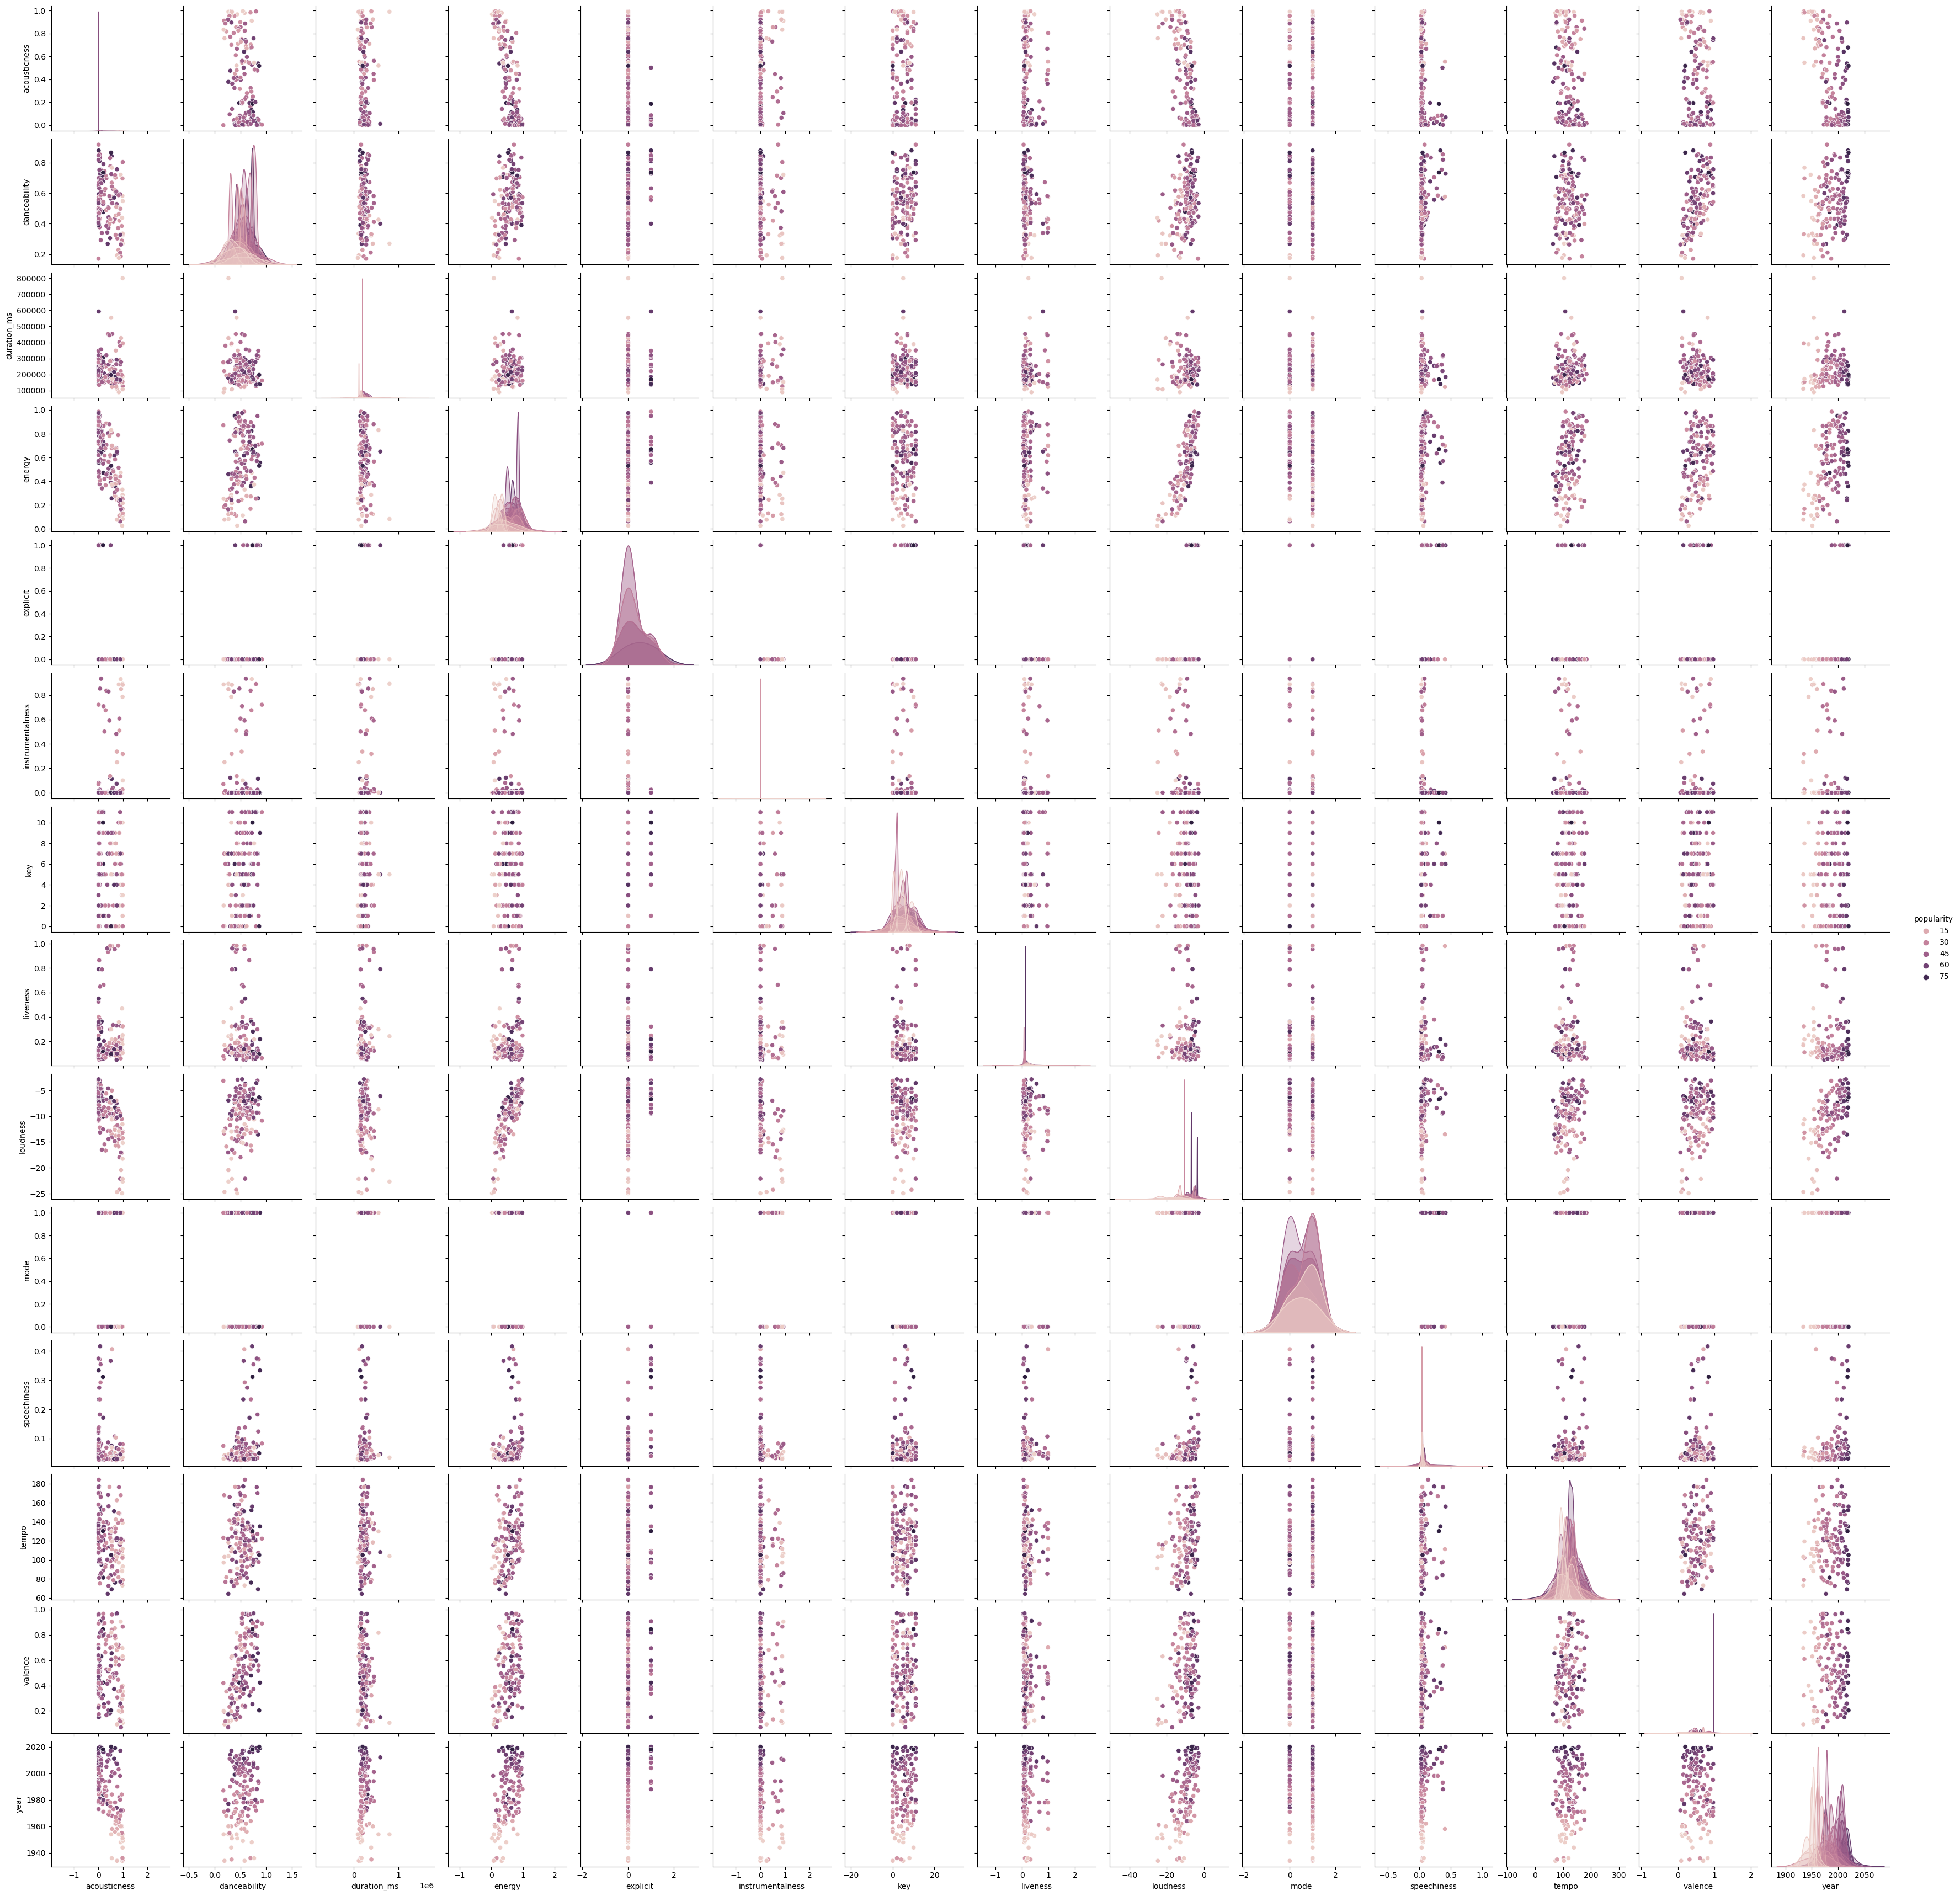

In [72]:
# muito demorado
sns.pairplot(data.sample(frac=0.001, random_state=2023), hue='popularity')

## Outliers

Acústica

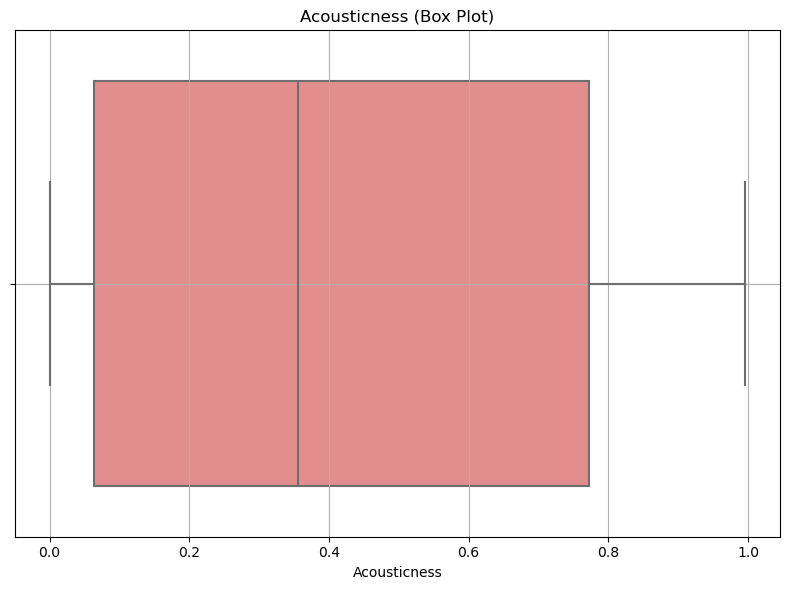

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['acousticness'], color='lightcoral')
    
plt.title('Acousticness (Box Plot)')
plt.xlabel('Acousticness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Danceabilidade

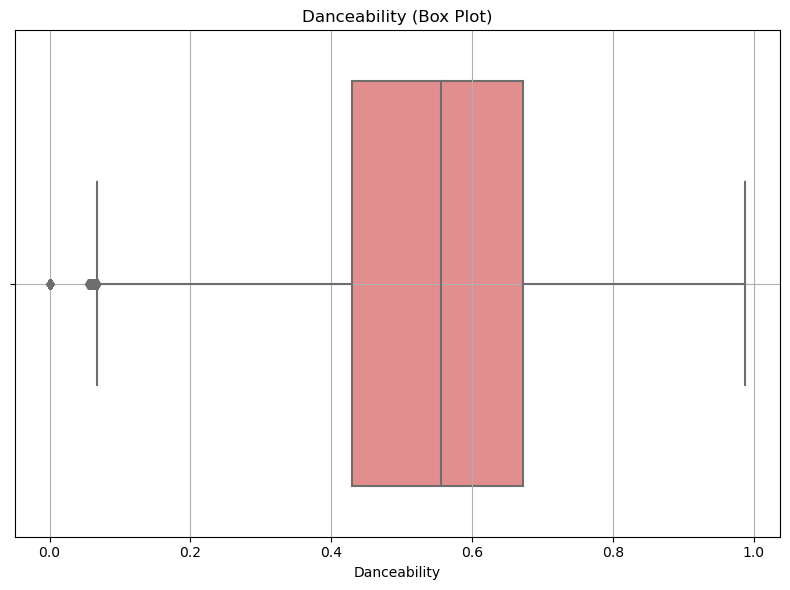

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['danceability'], color='lightcoral')
    
plt.title('Danceability (Box Plot)')
plt.xlabel('Danceability')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Duration

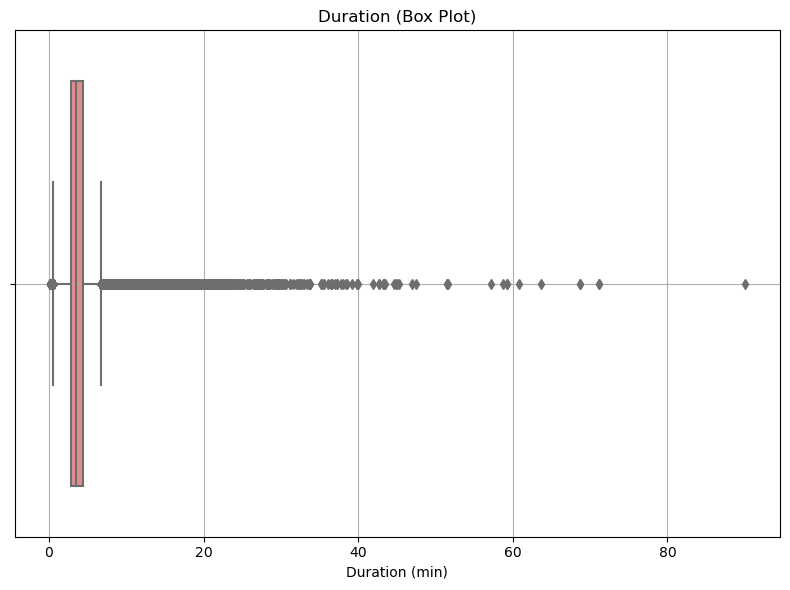

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['duration_minutes'], color='lightcoral')
    
plt.title('Duration (Box Plot)')
plt.xlabel('Duration (min)')
    
plt.grid(True)
plt.tight_layout()
plt.show()